In [175]:
import pandas as pd
df = pd.read_excel("C:/Users/fatsall/Documents/Stage/EDF/Resultats/EDF_result_FR.xlsx",sheetname="desc_topic")
df.head()

C:\Anacond\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


Theme                         0                      1  \
0              Changement         adresse ( 29.139 )  changement ( 18.756 )   
1  Supprimer collobarateur  collaborateur ( 79.688 )    supprimer ( 4.180 )   
2              Changement          compte ( 28.577 )     changer ( 22.504 )   
3            Tarification           tarif ( 86.290 )  réclamation ( 5.730 )   
4            Espace client            mail ( 3.375 )      envoyer ( 2.506 )   

                      2                   3                      4  \
0        mail ( 9.565 )  modifier ( 8.127 )          nom ( 6.948 )   
1    modifier ( 0.737 )   reprise ( 0.354 )       besoin ( 0.351 )   
2        edf ( 12.797 )   demande ( 8.109 )  facturation ( 4.861 )   
3        bleu ( 0.204 )    option ( 0.191 )        jaune ( 0.190 )   
4  historique ( 2.156 )   facture ( 2.120 )          mai ( 2.102 )   

                        5                    6                   7  \
0  modification ( 2.931 )    contact ( 1.122 )       rio ( 0.777 )   
1     installer ( 0.350 )      devon ( 0.348 )      vite ( 0.345 )   
2      rubrique ( 3.924 )        nom ( 3.667 )       rio ( 1.390 )   
3          coût ( 0.181 )  tarifaire ( 0.179 )  procéder ( 0.176 )   
4     connexion ( 2.074 )     alerte ( 2.070 )      long ( 2.061 )   

                       8  ...                        41                   42  \
0      envoyer ( 0.644 )  ...   collaborateur ( 0.512 )  souhaiter ( 0.509 )   
1       manque ( 0.344 )  ...             pol ( 0.312 )       prix ( 0.310 )   
2      ajouter ( 0.995 )  ...          gérant ( 0.272 )  titulaire ( 0.270 )   
3  application ( 0.175 )  ...       consulter ( 0.157 )  puissance ( 0.155 )   
4  association ( 2.060 )  ...           lundi ( 1.882 )    informe ( 1.873 )   

                         43                   44                     45  \
0  dématérialiser ( 0.507 )     compte ( 0.505 )      changer ( 0.503 )   
1          casser ( 0.310 )         et ( 0.306 )  électricité ( 0.305 )   
2           avril ( 0.270 )  retrouver ( 0.265 )     habitude ( 0.265 )   
3        recevoir ( 0.155 )     papier ( 0.155 )     cohérent ( 0.154 )   
4        retrouve ( 1.869 )    débiter ( 1.860 )        prise ( 1.842 )   

                       46                  47                    48  \
0     déménager ( 0.500 )      site ( 0.498 )  nécessaire ( 0.487 )   
1       coffret ( 0.304 )  incident ( 0.303 )   confiance ( 0.303 )   
2       facture ( 0.260 )      côte ( 0.260 )  protection ( 0.256 )   
3        ouvrir ( 0.154 )   accéder ( 0.154 )  assistance ( 0.152 )   
4  raccordement ( 1.831 )      auto ( 1.763 )       jaune ( 1.755 )   

                      49 topic  
0       ancien ( 0.478 )   165  
1          sud ( 0.300 )    20  
2    expliquer ( 0.245 )   213  
3    déménager ( 0.151 )    32  
4  branchement ( 1.745 )    29  

[5 rows x 52 columns]

In [176]:
data=df.groupby(['Theme'])['topic'].sum()

In [177]:
data=pd.DataFrame(data)


In [178]:
dict_theme_word_cloud={}

In [179]:
list_mot=[]
df1=df[df['Theme']=='Divers']
for i in range(50):
    list_mot += df1[i].tolist()

In [180]:
for theme in df.Theme:
    list_mot=[]
    df1=df[df['Theme']==theme]
    for i in range(50):
        list_mot += df1[i].tolist()
    dict_theme_word_cloud[theme]=list_mot

Wordcloud:Changement 


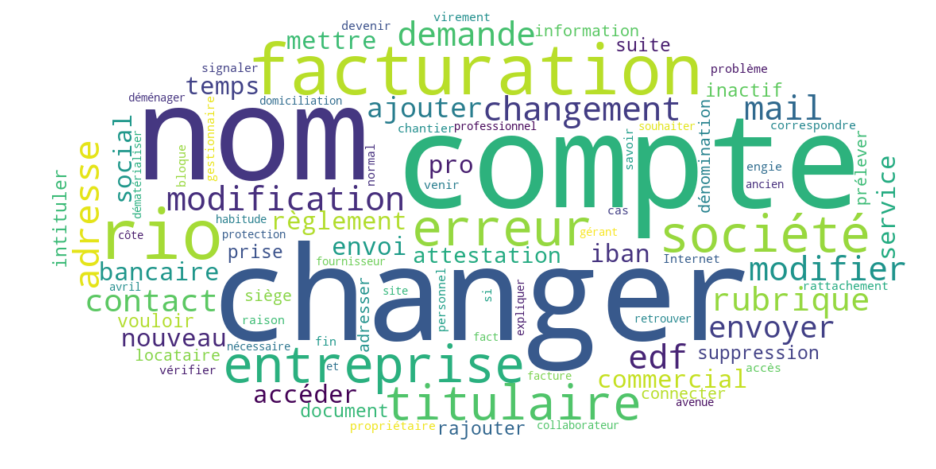

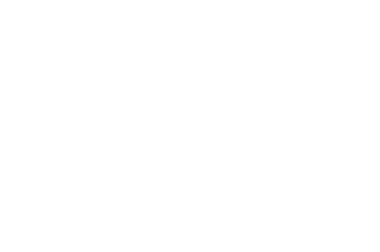

Wordcloud:Supprimer collobarateur


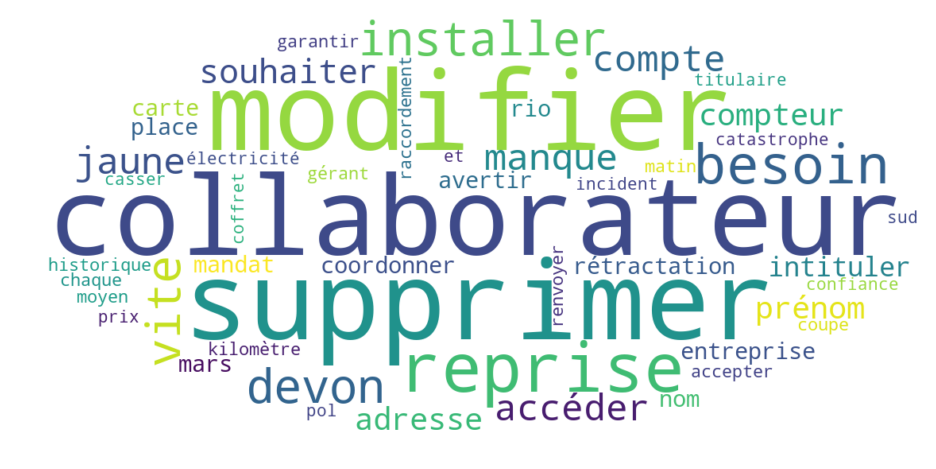

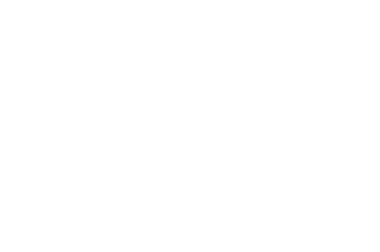

Wordcloud:Tarification 


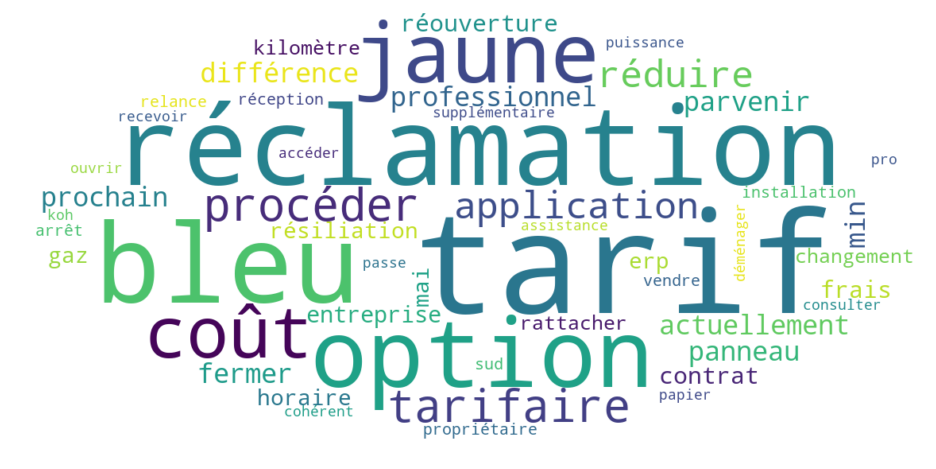

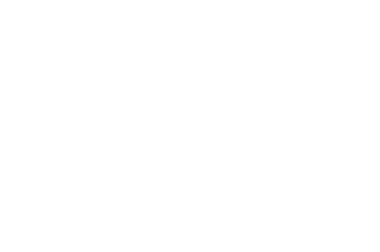

Wordcloud:Espace client


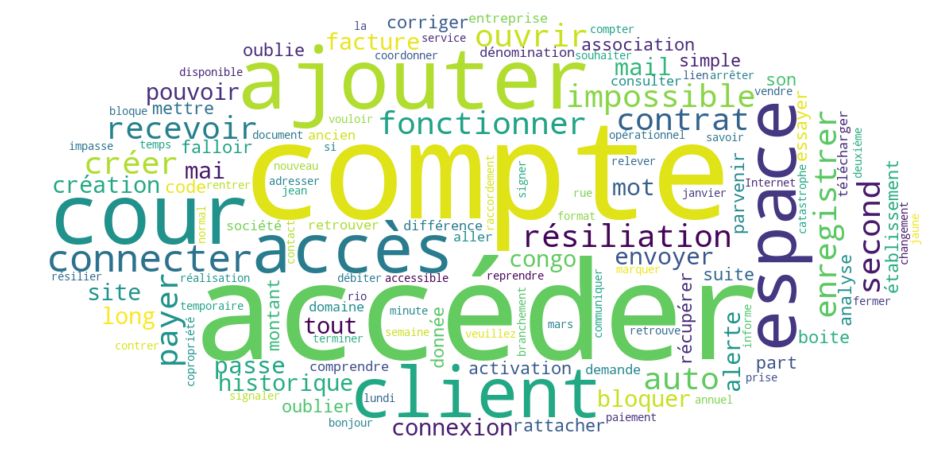

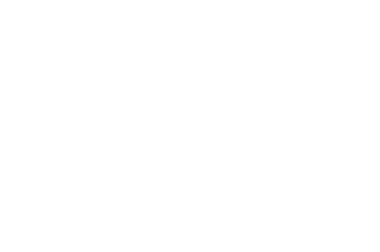

Wordcloud:Souscription SAV


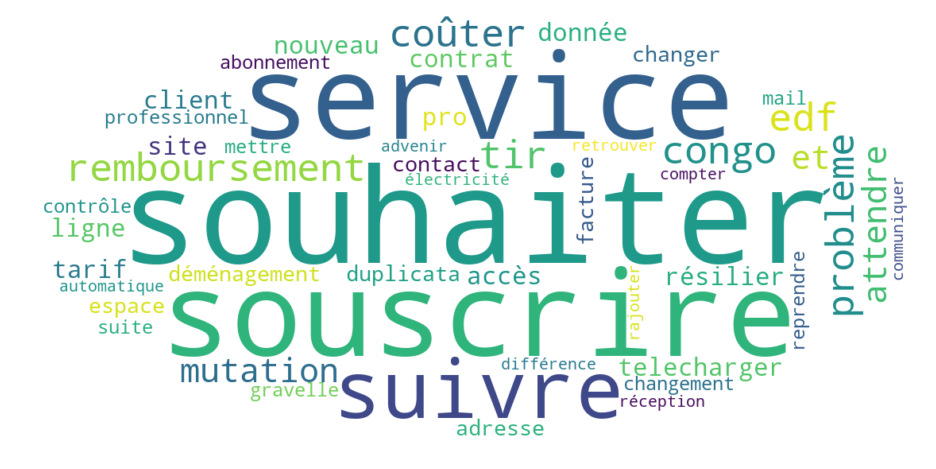

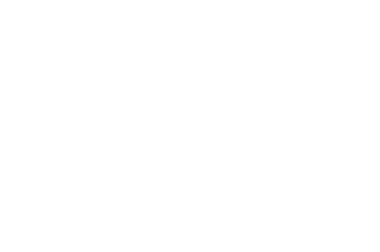

Wordcloud:Compteur


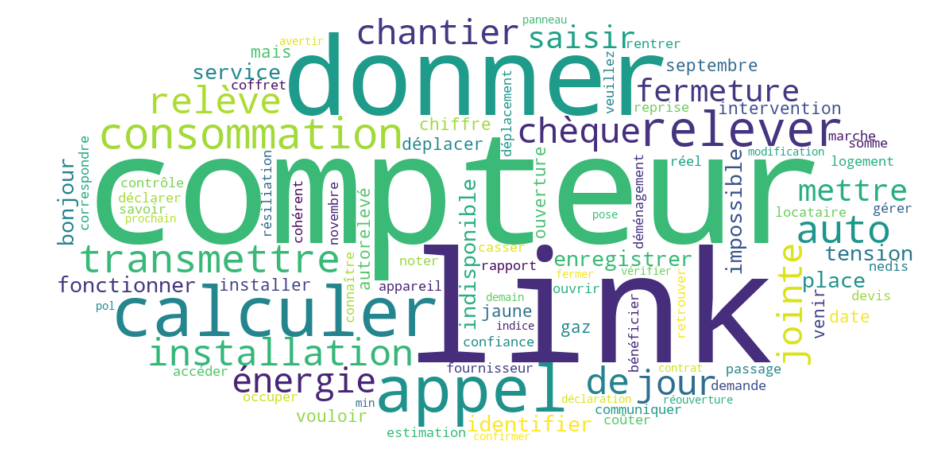

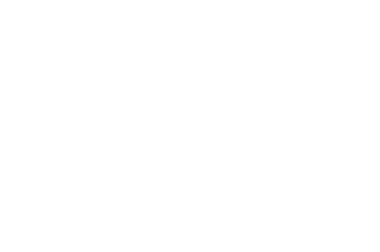

Wordcloud:Contrat


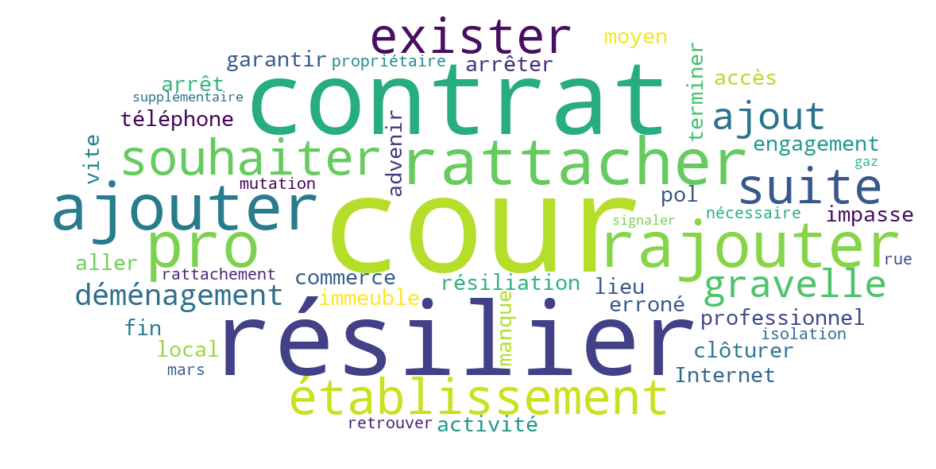

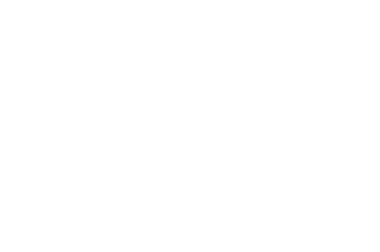

Wordcloud:Facture


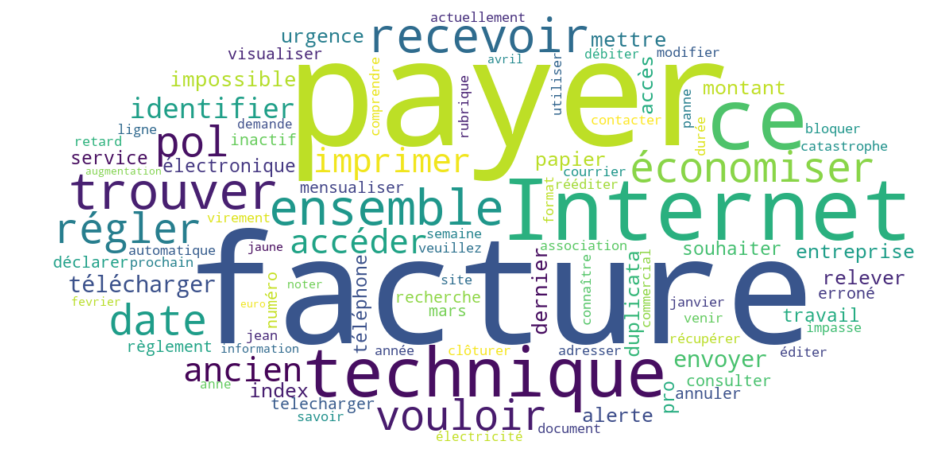

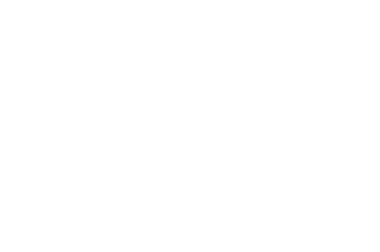

Wordcloud:Justificatif de domicile


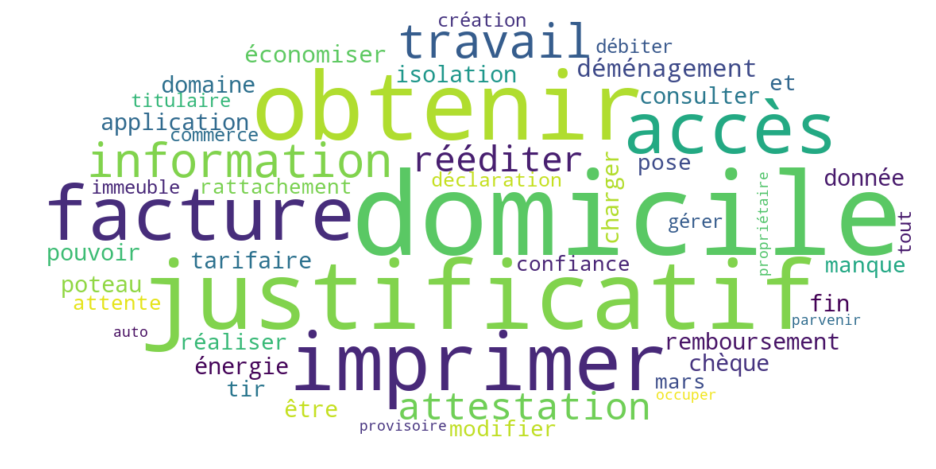

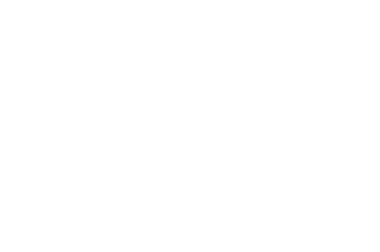

Wordcloud:Paiement


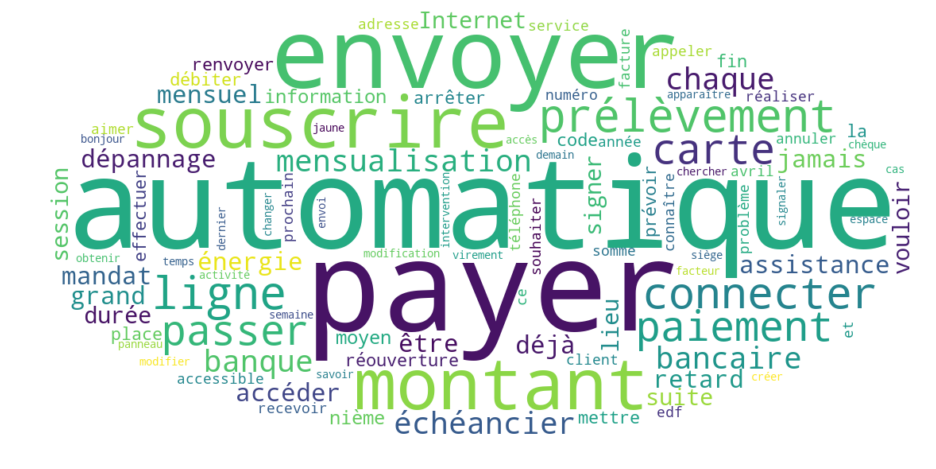

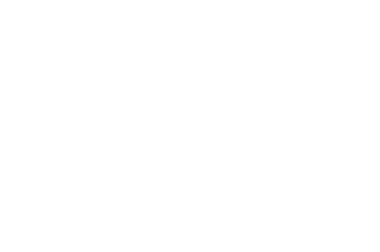

Wordcloud:rendez-vous


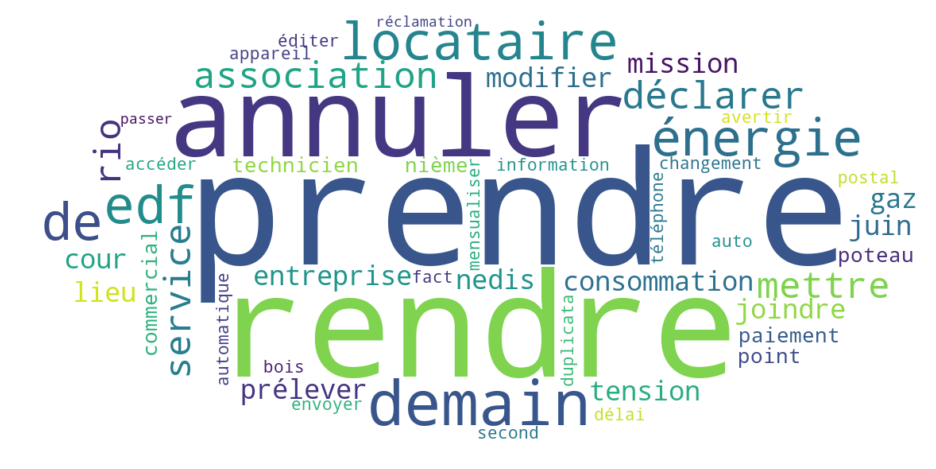

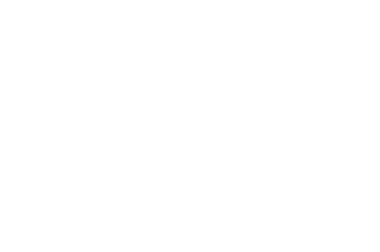

Wordcloud:Bilan Consommation


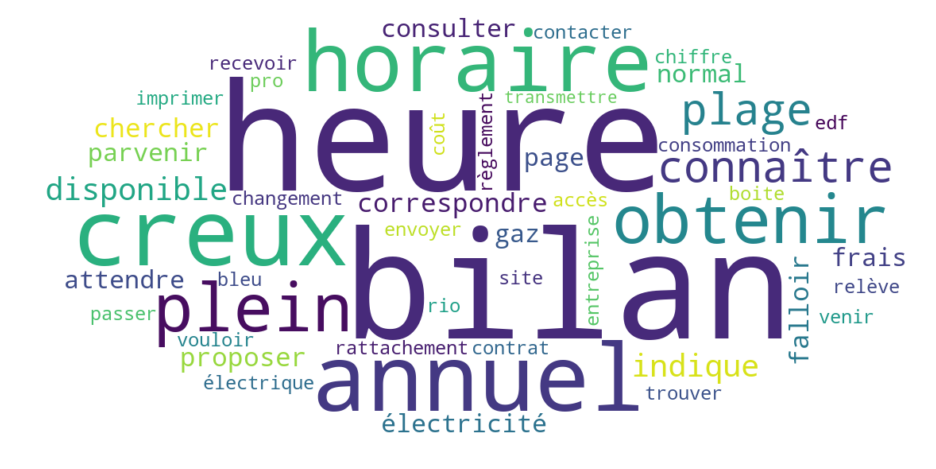

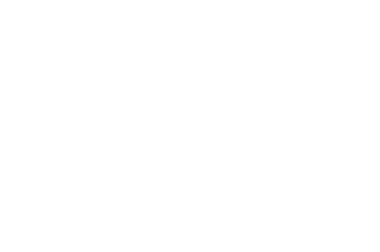

Wordcloud:Résiliation


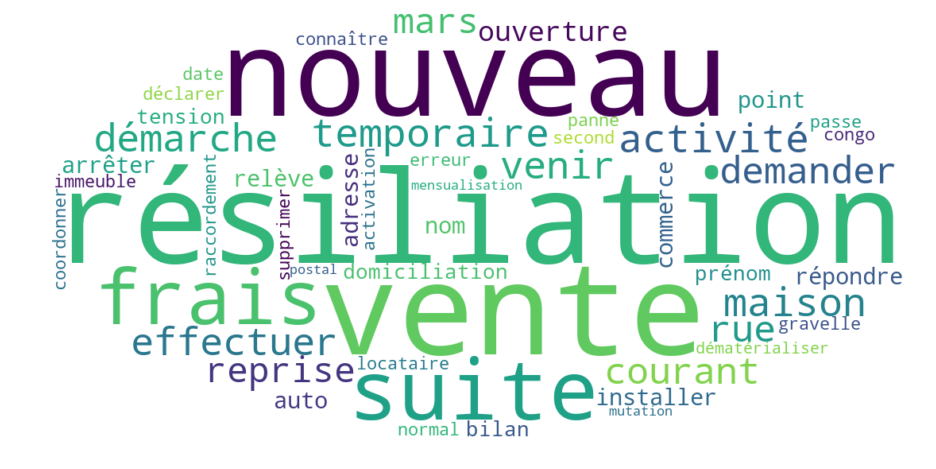

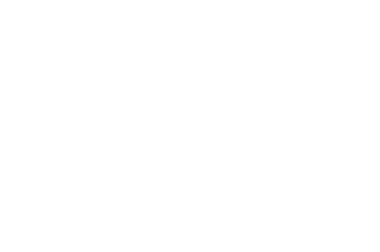

Wordcloud:Souscription


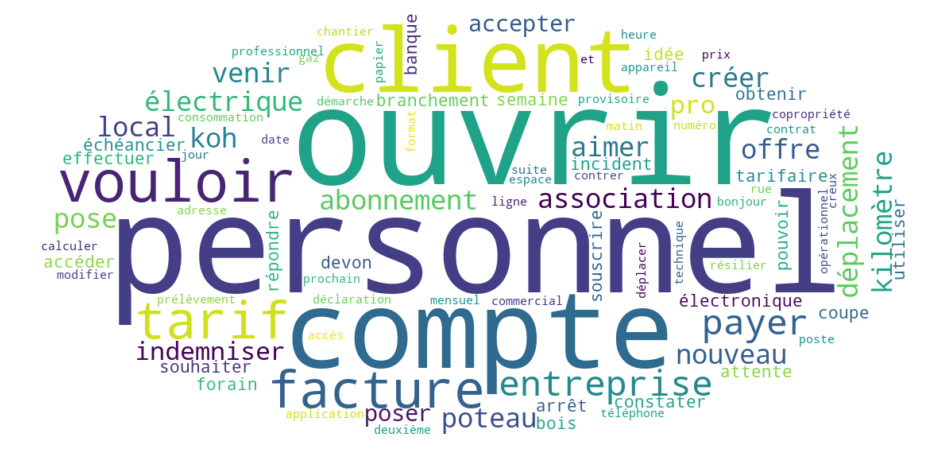

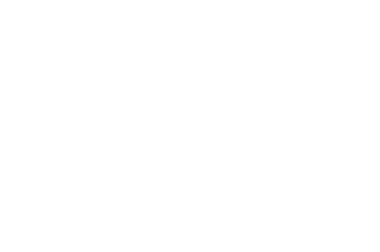

Wordcloud:Conseiller en ligne


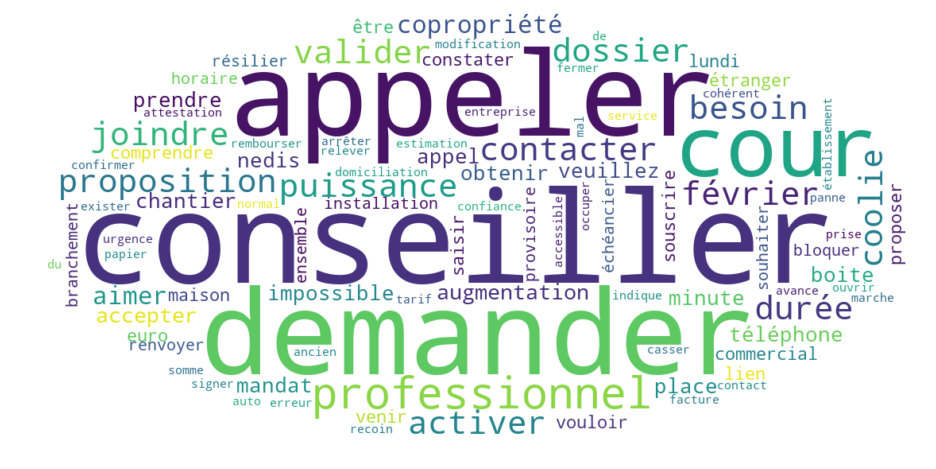

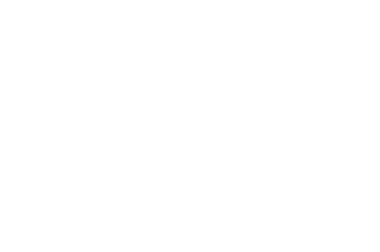

Wordcloud:Divers


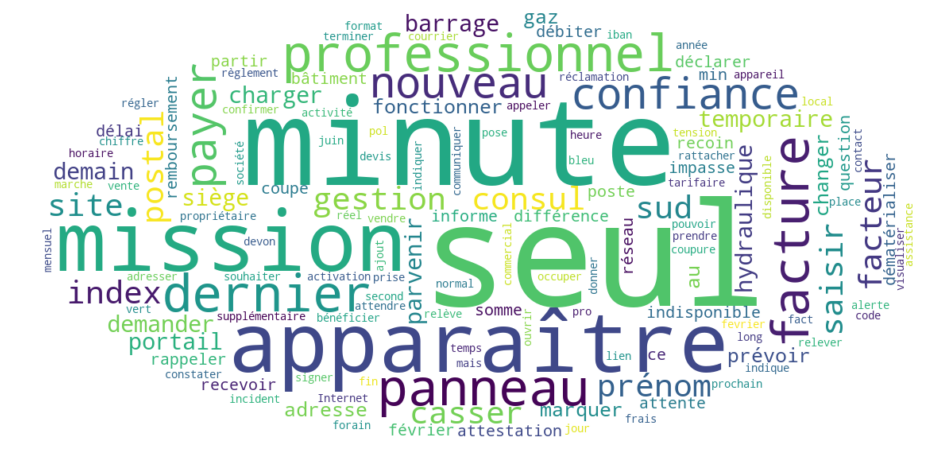

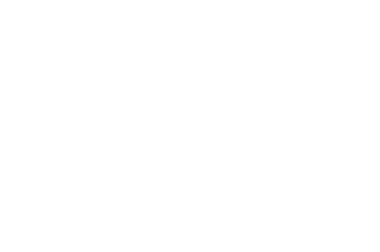

Wordcloud:Autorelevé


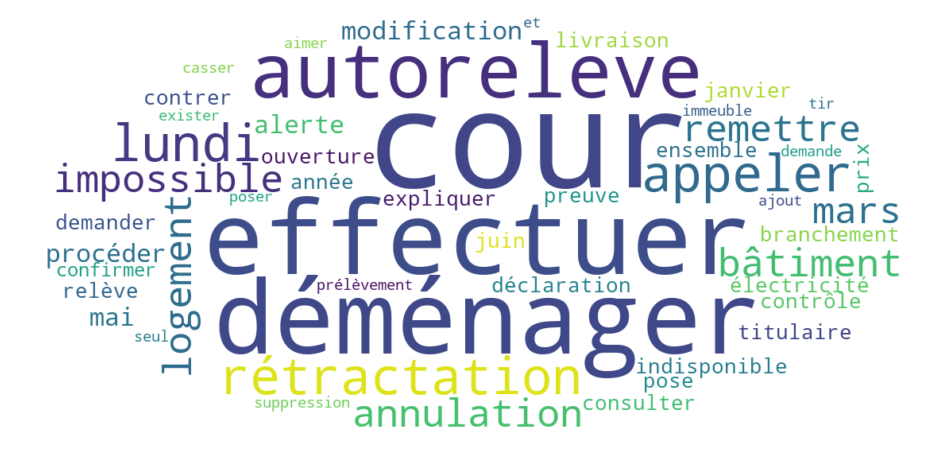

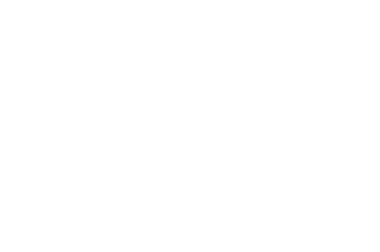

Wordcloud:Contact


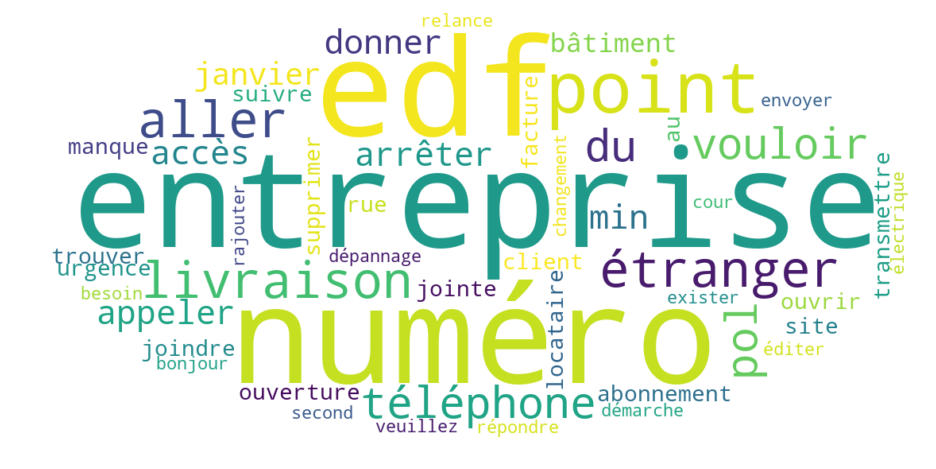

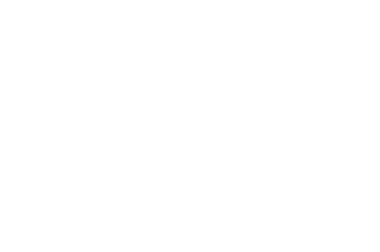

Wordcloud:Incident tecnhique


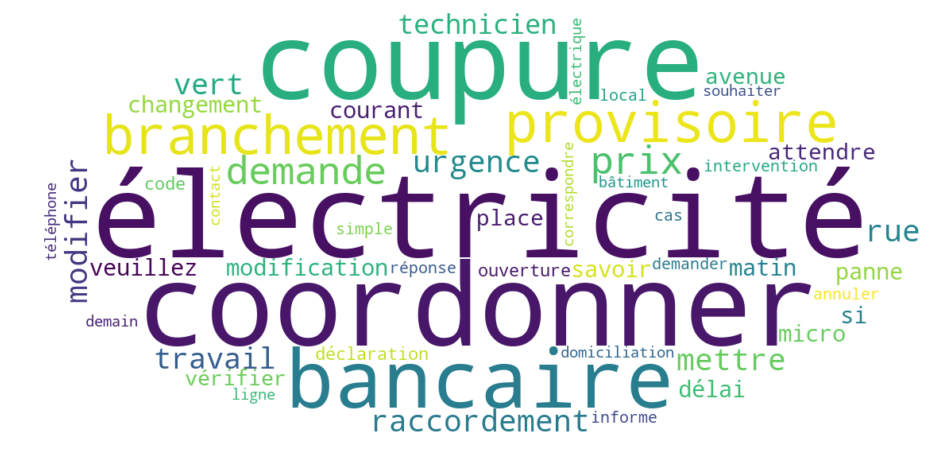

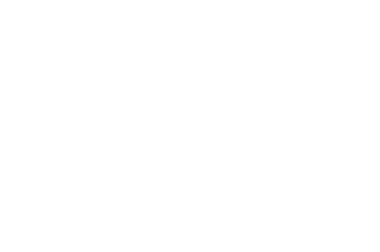

Wordcloud:Incident technique


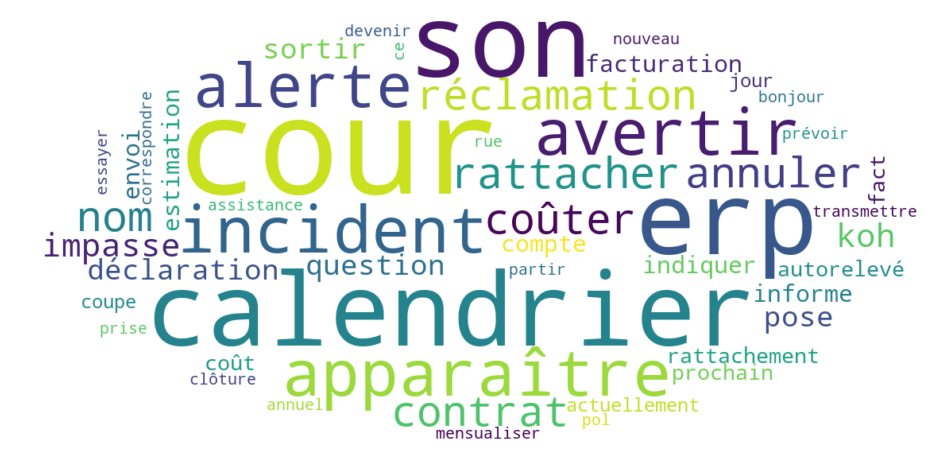

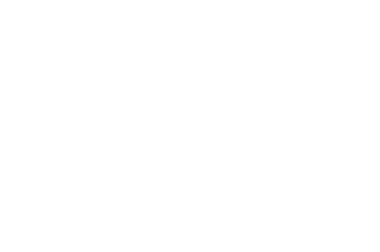

In [181]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import numpy as np

d = "C:/Users/fatsall/Documents/Stage/EDF/Resultats"
edf_mask = np.array(Image.open(path.join(d, "edf_mask.png")))

for key,value in dict_theme_word_cloud.items():
    print("Wordcloud:{}".format(key))
    # Create a list of word
    text=' '.join(value)
    # Create the wordcloud object
    #wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
    
    fig = plt.figure(figsize=(16,12))
    # Display the generated image:
    #plt.imshow(wordcloud, interpolation='bilinear')
   # plt.axis("off")
    #plt.margins(x=0, y=0)
   # plt.show()
    
    wc = WordCloud(background_color="white", mask=edf_mask, )

    # generate word cloud
    wc.generate(text)

    # store to file
    wc.to_file(path.join(d, "images/{}.png".format(key)))

    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.figure()
   # plt.imshow(edf_mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [190]:
import webbrowser

f = open('Resultats/bubble_char/bubble_char.html','w')

message = """
<!DOCTYPE html>
<html lang="en">
<head>
		<title>Nuage des mots</title>
		<script type="text/javascript" src="https://d3js.org/d3.v4.min.js"></script>

		<link rel = "stylesheet" type = "text/css" href = "style.css" />

		    svg { background-color: #F1F3F3 }

		</style>
</head>
<body>

	<script type="text/javascript">

"""
f.write(message)

f.write('dataset1 = { \n "country": "",\n')
f.write('"children": [')
for i in  range(len(data)-1):
    f.write('{"Currency":"'+str(data.index[i])+'", "value":' +str(data['topic'][i])+', "Number":"' +str(data['topic'][i])+ '"}, \n ')
f.write('{"Currency":"'+str(data.index[i+1])+'", "value":' +str(data['topic'][i+1])+', "Number":"' +str(data['topic'][i+1])+ '"} \n ')
f.write(']\n};')

message ="""
        // set color scheme and bubble chart size
        var diameter = 1200;
        var width = 1200;
        var height = 1000;
        
        var color = d3.scaleOrdinal(d3.schemeCategory20);

        // set bubble parameters
        var bubble = d3.pack(dataset1)
            .size([width, height]) // should be equal to svg w and h
            .padding(3);

        var tooltip = d3.select("body")
                        .append("div")
                        .style("position", "absolute")
                        .style("z-index", "10")
                        .style("visibility", "hidden")
                        .style("color", "white")
                        .style("padding", "8px")
                        .style("background-color", "rgba(0, 0, 0, 0.75)")
                        .style("border-radius", "6px")
                        .style("font", "12px sans-serif")
                        .text("tooltip");

        // set svg parameters
        var svg = d3.select("body")
            .append("svg")
            .attr("width", width)
            .attr("height", height)
            .attr("class", "bubble");

        svg.append("text")
            .attr("x", (width / 2))             
            .attr("y", 30)
            .attr("text-anchor", "middle")  
            .style("font-size", "16px") 
            .style("text-decoration", "underline")  
            .text("Nuage des topics.");

        // set nodes size correlated with dataset.cap
        var nodes = d3.hierarchy(dataset1)
            .sum(function(d) { return d.value; });

        // append node on svg, bind the data from children class
        var node = svg.selectAll(".node")
            .data(bubble(nodes).descendants())
            .enter()
            .filter(function(d){return  !d.children })
            .append("g")
            .attr("class", "node")
            .attr("transform", function(d) {
                return "translate(" + d.x + "," + d.y + ")";
            });

        node.append("circle")
            .attr("r", function(d) { return d.r; })
            .style("fill", function(d,i) { return color(i); })
            .on("click", function(d) {
                var name = d.data.Currency;
                return name; }) // pass a variable and its value to line chart.
            .on("mouseover", function(d) {
              tooltip.text(d.data.Currency + ": " + d.data.Number);
              tooltip.style("visibility", "visible");
            })
            .on("mousemove", function() { 
              return tooltip.style("top", (d3.event.pageY-10)+"px").style("left",(d3.event.pageX+10)+"px");
            })
            .on("mouseout", function(){return tooltip.style("visibility", "hidden");
            });


       node.append("text")
            .attr("x", function(d) { return d.Currency || d.Currency ? -10 : 10; })
            .attr("dy", ".35em")
            .style("text-anchor", "middle")
            .text(function(d) {
                return d.data.Currency.substring(0, d.r*2 );
            })
            .call(wrap, 40)
            .attr("font-family", "Arial")
            .attr("weight", "bold")
            .attr("font-size", function(d){
                return 15;
            })
            .attr("font-weight","bold")
            .attr("fill", "white");
            
            
        d3.select(self.frameElement)
            .style("height", diameter + "px");
            
        function wrap(text, width) {
            text.each(function() {
                var text = d3.select(this),
                words = text.text().split(/\s+/).reverse(),
                word,
                line = [],
                lineNumber = 0,
                y = text.attr("y"),
                dy = parseFloat(text.attr("dy")),
                lineHeight = 1.1, // ems
                tspan = text.text(null).append("tspan").attr("x", function(d) { return d.children || d._children ? -10 : 10; }).attr("y", y).attr("dy", dy + "em");     
                while (word = words.pop()) {
                    line.push(word);
                    tspan.text(line.join(" "));
                    var textWidth = tspan.node().getComputedTextLength();
                    if (tspan.node().getComputedTextLength() > width) {
                        line.pop();
                        tspan.text(line.join(" "));
                        line = [word];
                        ++lineNumber;
                        tspan = text.append("tspan").attr("x", function(d) { return d.children || d._children ? -10 : 10; }).attr("y", 0).attr("dy", lineNumber * lineHeight + dy + "em").text(word);
                    }
                }
            });
        }
        // When the user click map, the bubble updates according to the country clicked.

        var buttons = d3.select("body")
                        .append("div")
                        .attr("clasee", "countries-button")
                        .selectAll("div")
                        .data(dataset1.country)
                        .enter()
                        .append("button")
                        .text(function(d){
                            return d;
                        });
                        
                        

            buttons.on("click", function(d){
                    d3.select(node)
                        .transition()
                        .duration(500)
                        .style("background", "lightBlue");

                    update(d);
                    })

        

	</script>
</body>
</html>
"""

f.write(message)
f.close()

#webbrowser.open_new_tab('helloworld.html')